# A neural network for a classification with multiple labels

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [2]:
directory_data  = './sample_data'
filename_data   = 'assignment_04_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [3]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('size of vector_x_train :', vec_x_train.shape)
print('size of vector_x_test :', vec_x_test.shape)
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000, 5)
*************************************************
size of x_test : (4500, 28, 28)
size of y_test : (4500, 5)
*************************************************
size of vector_x_train : (10000, 784)
size of vector_x_test : (4500, 784)
*************************************************


## index for each class

In [4]:
# 5
number_class    = y_train.shape[1]
# 784
length_data     = vec_x_train.shape[1]

index_train = {}
index_test  = {}
print(type(index_train), type(index_test))
number_index_train  = np.zeros(number_class)
number_index_test   = np.zeros(number_class)

for i in range(number_class):
    # 딕셔너리에 key,value 추가
    # ground truth에서 각 열에 1이 몇 개 있는지 세서 저장
    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)
    
    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

<class 'dict'> <class 'dict'>


In [5]:
test_array = np.array([[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0],[0,0,1,0,0]])
print(np.where(test_array[: ,2] == 1))

print(index_train[0])
print(np.shape(index_train[0]))
print(number_index_train )
print(number_index_test)

(array([0, 3]),)
(array([   0,    1,    2, ..., 1997, 1998, 1999]),)
(1, 2000)
[2000. 2000. 2000. 2000. 2000.]
[900. 900. 900. 900. 900.]


In [6]:
print('*************************************************')
print('number of classes :', number_class)
print('length of data :', length_data)
print('*************************************************')
print('number of training images for each class :', number_index_train)
print('number of testing images for each class :', number_index_test)
print('*************************************************')

*************************************************
number of classes : 5
length of data : 784
*************************************************
number of training images for each class : [2000. 2000. 2000. 2000. 2000.]
number of testing images for each class : [900. 900. 900. 900. 900.]
*************************************************


## plot grey image

In [7]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 3 
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

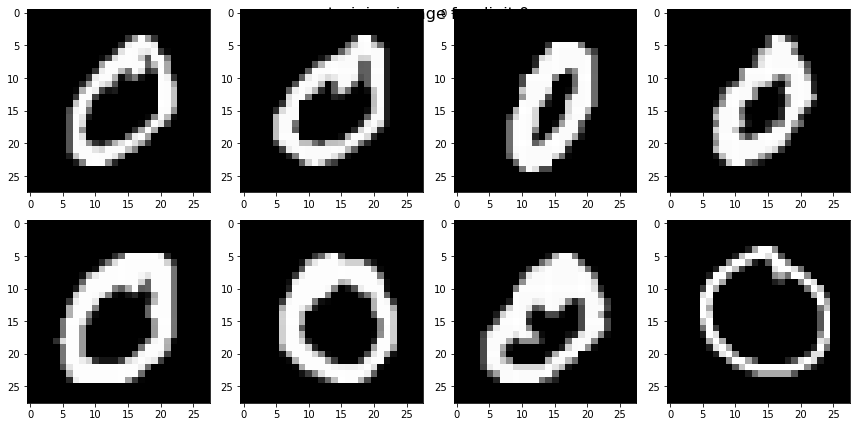

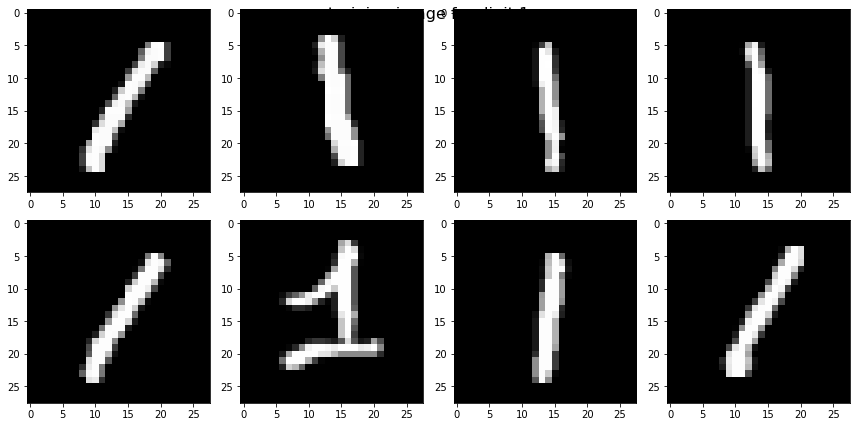

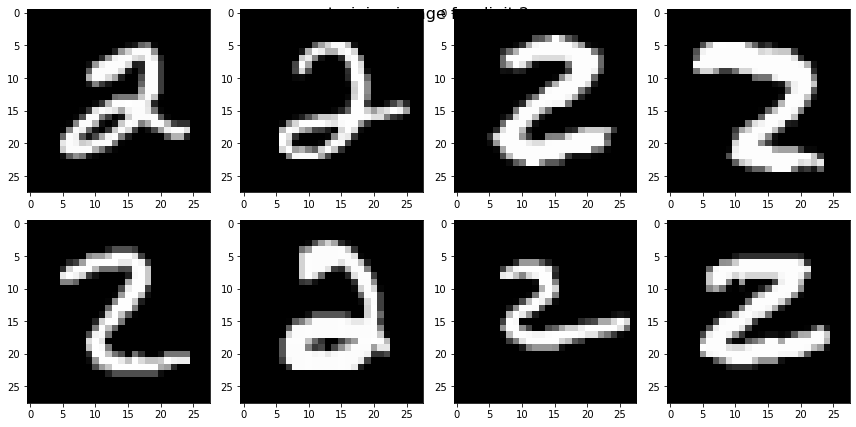

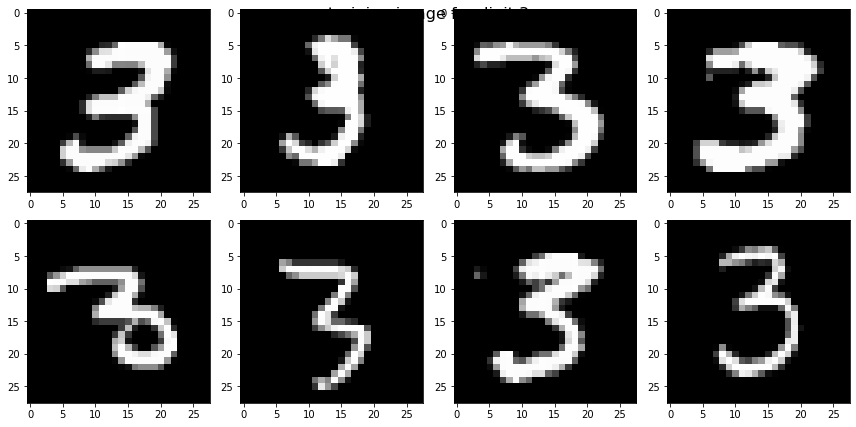

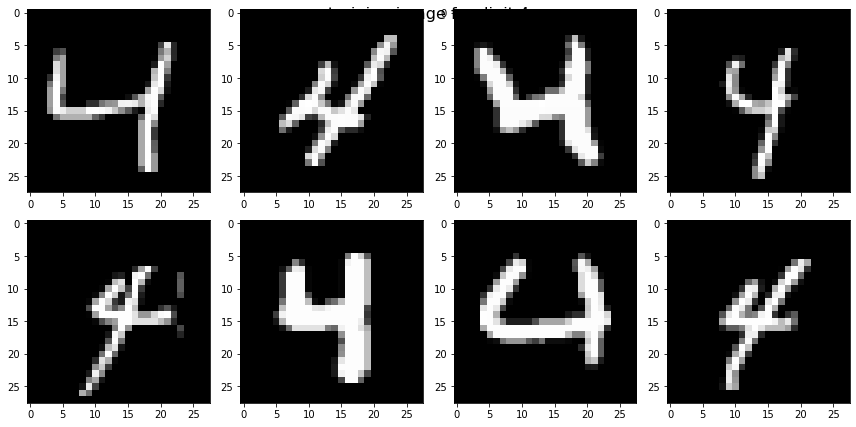

In [8]:
for c in range(number_class):

    index_class = c
    title       = 'training image for digit ' + str(index_class)
    plot_image(title, x_train[index_train[index_class][0]])

## initialize the neural network

- neural network consists of fullly connected linear layer followed by softmax activation function
- the size of the fully connected layer is input (length of data) and output (number of classes)

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [9]:
# 784
size_input  = length_data 
# 5
size_output = number_class

weight = np.ones((size_input, size_output))

In [10]:
print('size of the weight :', weight.shape)

size of the weight : (784, 5)


## define neural network 

### define softmax function 

- input : number of data $\times$ number of classes
- output : number of data $\times$ number of classes

In [11]:
def activation_softmax(input):

# ================================================== 
# fill up the blank
#
# 10000, 5 shape
    # apply exp calculation to all elements
    exp_input = np.exp(input)
    # Sum the rows and take the reciprocal of all elements & reshape to make broadcast calculation possible
    exp_input_rowsum = np.reciprocal(exp_input.sum(axis=1)).reshape(input.shape[0], 1)
    # broadcast calculation of numpy
    output = exp_input * exp_input_rowsum
#
# ================================================== 

    return output 

In [13]:
# temp = np.array([[1,2,3,4,5],[1,2,7,4,5],[1,9,3,4,5],[1,11,3,4,5]])
# print(activation_softmax(temp))
# print(activation_softmax(temp).sum(axis=1))

# print(vec_x_train[0])

### define the layer

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- output : number of data $\times$  number of classes

In [14]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
# input : ( 10000, 784) / weight: ( 784, 5) / output: ( 10000, 5)
    
    output = input.dot(weight)

#
# ================================================== 

    return output

## define forward propagation

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- prediction : number of data $\times$  number of classes

In [15]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
# fully-connected Layer -> softmax 

    fully = layer_fully_connected(input, weight)
    # print(fully.shape)
    # print(fully)
    
    prediction = activation_softmax(fully)

#
# ================================================== 
    
    return prediction 

In [16]:
# print(vec_x_train.shape, weight.shape)
# print(vec_x_test)
# print(np.ones((784,5)))
# print(compute_prediction(vec_x_test, np.ones((784,5))))



## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $- \sum_k y_k \log(h_k)$
  - $y_k$ : $k$-th element in grount truth
  - $h_k$ : $k$-th element in prediction
- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- loss : number of data $\times$ 1 

In [17]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    # parameters have (10000, 5) shape
    temp_pred = prediction + 1e-20
    temp_pred = -np.log(temp_pred)
    # element-wise multiplication
    # The loss value from each of the train Image. so the shape bacame (10000, 1)
    each_loss = (temp_pred * label).sum(axis = 1)
    loss = each_loss.reshape(prediction.shape[0],1)

#
# ================================================== 

    return loss

## compute the accuracy

- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- accuracy : scalar
- note that iterations over the input data are not allowed inside the function

In [18]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#
    num_data = prediction.shape[0]
    pred_max = np.argmax(prediction, axis=1)
    label_max = np.argmax(label ,axis=1)
    accuracy = np.sum(pred_max == label_max) / num_data

#
# ================================================== 

    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- input : number of data $\times$ length of data
- label : number of data $\times$ number of classes
- prediction : number of data $\times$  number of classes
- gradient : length of data $\times$ number of classes

In [19]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#
# input: (10000, 784) 
# label, prediction: (10000, 5)
    #(784, 5)
    gradient = (input.T).dot(prediction - label) / input.shape[0]

#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [20]:
number_iteration    = 1000
learning_rate       = 0.05
weight              = weight * 0.001

## variables for storing intermediate results

In [21]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_mean = np.zeros((number_class, number_iteration))
prediction_test_mean  = np.zeros((number_class, number_iteration))

## run the gradient descent algorithm

In [22]:
for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#

    # (10000, 5)
    pred_train = compute_prediction(vec_x_train, weight)
    # print(vec_x_train[10])
    # ( 4500, 5)
    pred_test = compute_prediction(vec_x_test, weight)
  
    # accuracy (Scalar value)
    accr_train = compute_accuracy(pred_train, y_train)
    # print(accr_train)
    accr_test = compute_accuracy(pred_test, y_test)

    # (10000, 1)
    loss_train = compute_loss(pred_train, y_train)
    # (4500, 1)
    loss_test = compute_loss(pred_test, y_test)
    
    weight = weight - learning_rate * compute_gradient_weight(vec_x_train, y_train, pred_train)

#
# ================================================== 

    accuracy_train[i]   = accr_train
    accuracy_test[i]    = accr_test
    
    loss_train_mean[i]  = np.mean(loss_train.reshape(1, 10000))
    loss_train_std[i]   = np.std(loss_train.reshape(1, 10000))
    loss_test_mean[i]   = np.mean(loss_test.reshape(1, 4500))
    loss_test_std[i]    = np.std(loss_test.reshape(1, 4500))

    for c in range(number_class):

       prediction_train_mean[c, i]   = np.mean(pred_train.sum(axis = 0)[c])
       prediction_test_mean[c, i]    = np.mean(pred_test.sum(axis = 0)[c])

100%|██████████| 1000/1000 [01:13<00:00, 13.67it/s]


---

## functions for presenting the results

---

In [23]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [24]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [25]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [26]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [27]:
def function_result_05():
    
    title           = 'prediction (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    for c in range(number_class):

        plt.plot(prediction_train_mean[c], '-', label=str(c))
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [28]:
def function_result_06():
    
    title           = 'prediction (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    for c in range(number_class):

        plt.plot(prediction_test_mean[c], '-', label=str(c))
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [29]:
def function_result_07():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [30]:
def function_result_08():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [31]:
def function_result_09():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [32]:
def function_result_10():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



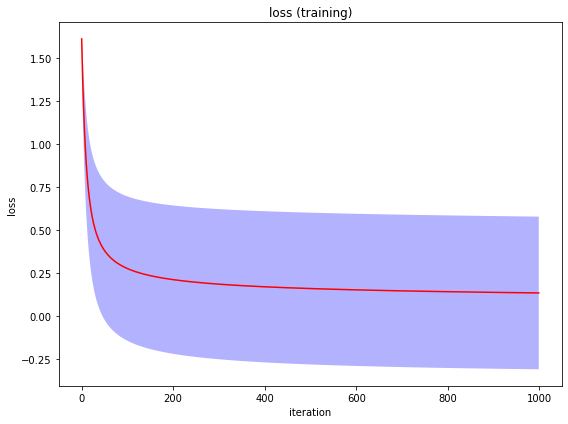


################################################################################
#
# RESULT # 02
#
################################################################################



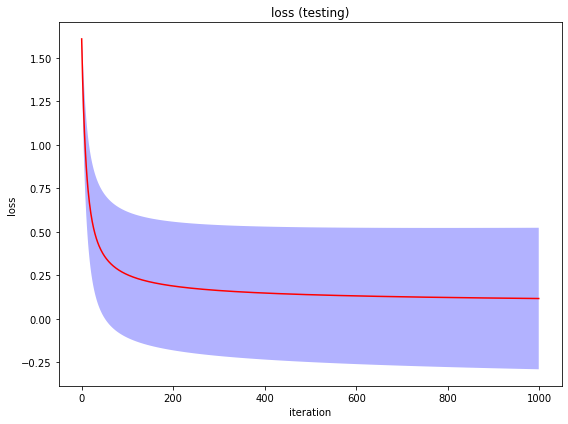


################################################################################
#
# RESULT # 03
#
################################################################################



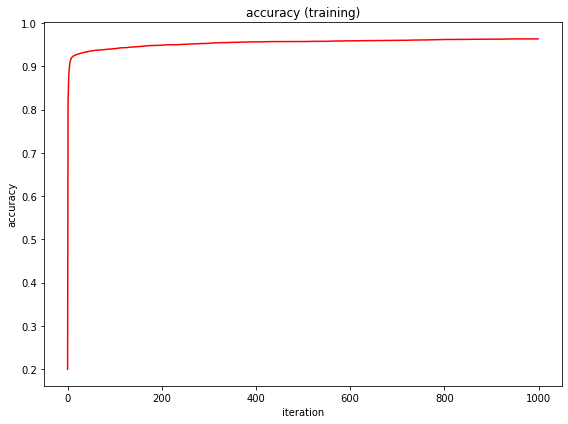


################################################################################
#
# RESULT # 04
#
################################################################################



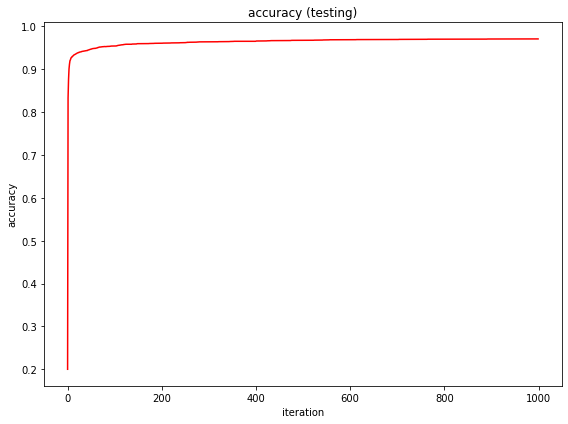


################################################################################
#
# RESULT # 05
#
################################################################################



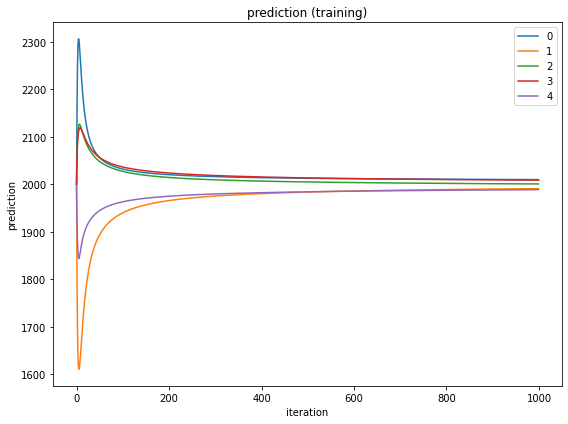


################################################################################
#
# RESULT # 06
#
################################################################################



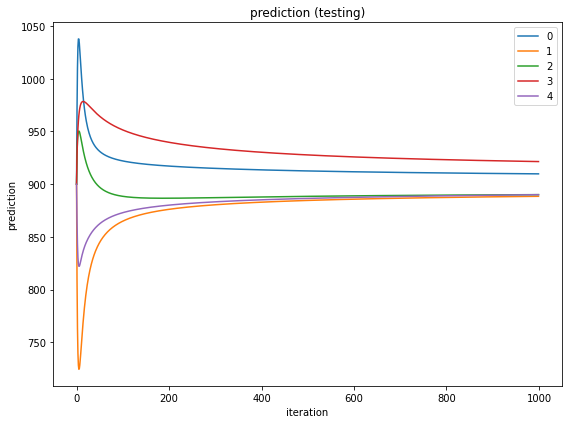


################################################################################
#
# RESULT # 07
#
################################################################################

final training loss = 0.13488

################################################################################
#
# RESULT # 08
#
################################################################################

final testing loss = 0.11649

################################################################################
#
# RESULT # 09
#
################################################################################

final training accuracy = 0.96310

################################################################################
#
# RESULT # 10
#
################################################################################

final testing accuracy = 0.97089


In [33]:
number_result = 10 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)